<a href="https://colab.research.google.com/github/chakrikaanousha/Predictive-Modeling-for-Diabetes-Detection/blob/main/Deep_Learning(RNN)_Based_Predictive_Modeling_for_Diabetes_Detection_Using_Multi_modal_Health_Data%2C_with_Emphasis_on_HbA1c_Levels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install utils
from utils import *
print("importing necessary libraries")

importing necessary libraries


In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

print(tf.__version__)

2.12.0


In [ ]:
import pandas as pd
#setting the column names
#names = ['gender' , 	'age', 	'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level','blood_glucose_level',	'diabetes']
#from pandas using read_csv function which returns a data frame
data=pd.read_csv("diabetes_prediction_dataset.csv" )
#to check the datset
data.head()#returns 5 rows from dataset


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [ ]:
d = []
u = []
t = []
for col in data:
    d.append(col)
    u.append(data[col].nunique())
    t.append(data[col].dtype)
pd.DataFrame({'column':d,'type': t ,'unique value' : u})

,column,type,unique value
0,gender,object,3
1,age,float64,102
2,hypertension,int64,2
3,heart_disease,int64,2
4,smoking_history,object,6
5,bmi,float64,4247
6,HbA1c_level,float64,18
7,blood_glucose_level,int64,18
8,diabetes,int64,2


In [ ]:
df.isna().sum() #isan return either true or false for each column + sum (as the number of columns are more we prefer taking the total as a whole)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
data.duplicated().sum()

3854

In [ ]:
data = data.drop_duplicates()


In [ ]:
from scipy import stats

test = data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
z = np.abs(stats.zscore(test))
data = data[(z < 3).all(axis=1)]

data.shape

NameError: ignored

In [ ]:
data['smoking_history'].replace({'never': 0, 'No Info': 1, 'current': 5, 'former': 4,
                                'not current': 6, 'ever': 7}, inplace=True)


data['gender'].replace({'Male': 1, 'Female': 2, 'Other': 3}, inplace=True)

data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,3,80.0,0,1,2,25.19,6.6,140,0
1,3,54.0,0,0,3,27.32,6.6,80,0
2,2,28.0,0,0,2,27.32,5.7,158,0
3,3,36.0,0,0,4,23.45,5.0,155,0
4,2,76.0,1,1,4,20.14,4.8,155,0


In [ ]:
#serial row is not needed:
#syntax: iloc[rows,column] - removing the 1stcolumn(i.e index=0)
          # : here specifies all rows
          # 1: from i=1 to all columns are being selected
df=df.iloc[:,1:]
df_norm = (df-df.mean())/df.std() #for every value it's calculated - By PandasLib process simp
df_norm.head()

<ipython-input-24-bca4740620ac>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_norm = (df-df.mean())/df.std() #for every value it's calculated - By PandasLib process simp
<ipython-input-24-bca4740620ac>:6: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_norm = (df-df.mean())/df.std() #for every value it's calculated - By PandasLib process simp


,HbA1c_level,age,blood_glucose_level,bmi,diabetes,heart_disease,hypertension,smoking_history
0,1.001701,1.692695,0.047704,-0.321054,-0.304787,4.936354,-0.284438,NaN
1,1.001701,0.538004,-1.426203,-0.000116,-0.304787,-0.202577,-0.284438,NaN
2,0.161107,-0.616688,0.489876,-0.000116,-0.304787,-0.202577,-0.284438,NaN
3,-0.492688,-0.261398,0.416181,-0.583229,-0.304787,-0.202577,-0.284438,NaN
4,-0.679486,1.515050,0.416181,-1.081965,-0.304787,4.936354,3.515669,NaN


In [ ]:
#df['x'] - selecting specified row i.e x, here
#calculating mean and S.D
y_mean =df['diabetes'].mean()
y_std= df['diabetes'].std()

def convert_label_value(pred):
    return int(pred*y_std+y_mean) #REVERSING: normalised values to original values



In [ ]:
#from the normalised data, eleted the price column
#select all the rows and columns expect the prize
x=df_norm.iloc[:,:8]
#print those values out
x.head()

,HbA1c_level,age,blood_glucose_level,bmi,diabetes,heart_disease,hypertension,smoking_history
0,1.001701,1.692695,0.047704,-0.321054,-0.304787,4.936354,-0.284438,NaN
1,1.001701,0.538004,-1.426203,-0.000116,-0.304787,-0.202577,-0.284438,NaN
2,0.161107,-0.616688,0.489876,-0.000116,-0.304787,-0.202577,-0.284438,NaN
3,-0.492688,-0.261398,0.416181,-0.583229,-0.304787,-0.202577,-0.284438,NaN
4,-0.679486,1.515050,0.416181,-1.081965,-0.304787,4.936354,3.515669,NaN


In [ ]:
#store the prices(Expected outputs) into a new variable
y=df_norm.iloc[:,-1] #columns -1 : only last column
y.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: smoking_history, dtype: object

In [ ]:
#required only values as inputs -  using numpy arrays
#accesing by using numpy (.values function)
x_arr=x.values
y_arr=y.values

print( x_arr.shape)
print( y_arr.shape)

#explaination about output:
#(5000, 6) - 5000 examples of 6 features

(100000, 8)
(100000,)


In [ ]:
#Training: 5000 examples
#training: x_train and y_train - 4750 exampels
#testing: x_test and y_test - 250 examples

#test size = 0.5 : which means only 5% data is used for testing

x_train, x_test, y_train, y_test = train_test_split(x_arr, y_arr, test_size=0.05, random_state =0)
print( x_train.shape, y_train.shape)
print(y_test.shape, y_test.shape)

(95000, 8) (95000,)
(5000,) (5000,)


In [ ]:
def get_model():
#considering, 3layers + ReLu Activationfxn
#using Squential from Keras:
    model = Sequential([
        #Layer 1 : Dense , no.of nodes = 10, inputfeatures = 6, activationfxn - rectified Linear Unit
        Dense(10, input_shape=(6,), activation ='relu'),
        #Layer 2 : fully connected Dense Layer
        Dense(20, activation = 'relu'),
        #Hidden Layer
        Dense(5, activation = 'relu'),
        #Layer3: Output Layer - as regression prob, activation fxn - not req
        Dense(1)
    ])

    '''Model Summary:
    Its a Fully Connected Network -  its a dense full connected network:
    to calculate the parameters -
    Multiply no.of nodes with preceeding layers + bias
    ex. dense 2 = 5*20+5 =105'''

    model.compile(
    loss ='mse', #loss function: Mean Square Method
        optimizer = 'adam') #Optimiser - Adam - used for minimising loss funct.
    return model

get_model().summary() # summary -  models architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
# Replace 'your_dataset.csv' with the actual filename and path to your dataset
data = pd.read_csv('diabetes_prediction_dataset.csv')
data['smoking_history'].replace({'never': 0, 'No Info': 1, 'current': 5, 'former': 4, 'not current': 6, 'ever': 7}, inplace=True)
data['gender'].replace({'Male': 1, 'Female': 2, 'Other': 3}, inplace=True)

# Extract input features and target label
X = data[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
          'bmi', 'HbA1c_level', 'blood_glucose_level']]

y = data['diabetes']

# Data preprocessing
# You may need to perform additional preprocessing steps based on your dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Make predictions on new data
# Replace 'new_data' with your new data containing the same feature columns as the training data
# Additional new data examples with the same feature columns as the training data
new_data = np.array([
    [1,67,0,1,67,27.32,6.5,200],
    #[3,	80.0,	0,	1,	2,	25.19,	6.6,	140	],   # Example 3
    [2, 54, 0, 0, 3, 27.32, 6.6, 80],  # Example 4

    [2,44.0,0,0,2,19.31,6.5,200],   # Example 6
    [3, 65, 1, 0, 3, 29.9, 7.0, 120],   # Example 5
])

# Convert numpy array to a pandas DataFrame with feature names
feature_names = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
new_data_df = pd.DataFrame(new_data, columns=feature_names)

#
new_data_scaled = scaler.transform(new_data_df)
predictions = model.predict(new_data_scaled)

# 'predictions' will contain probabilities between 0 and 1
# You can set a threshold to classify them as presence (1) or no presence (0) of diabetes
threshold = 0.5
predicted_classes = (predictions > threshold).astype(int)

# 'predicted_classes' will now contain 0s and 1s representing the predicted classes
print(predicted_classes)


Epoch 1/10
2500/2500 [==============================] - 9s 3ms/step - loss: 0.1296 - accuracy: 0.9562 - val_loss: 0.1083 - val_accuracy: 0.9628
Epoch 2/10
2500/2500 [==============================] - 6s 3ms/step - loss: 0.1046 - accuracy: 0.9654 - val_loss: 0.0947 - val_accuracy: 0.9686
Epoch 3/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0937 - accuracy: 0.9685 - val_loss: 0.0872 - val_accuracy: 0.9714
Epoch 4/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0886 - accuracy: 0.9701 - val_loss: 0.0841 - val_accuracy: 0.9718
Epoch 5/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0863 - accuracy: 0.9706 - val_loss: 0.0828 - val_accuracy: 0.9718
Epoch 6/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0855 - accuracy: 0.9708 - val_loss: 0.0828 - val_accuracy: 0.9718
Epoch 7/10
2500/2500 [==============================] - 6s 3ms/step - loss: 0.0851 - accuracy: 0.9711 - val_loss: 0.0819 - val_accuracy:

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
# Replace 'your_dataset.csv' with the actual filename and path to your dataset
data = pd.read_csv('diabetes_prediction_dataset.csv')
data['smoking_history'].replace({'never': 0, 'No Info': 1, 'current': 5, 'former': 4, 'not current': 6, 'ever': 7}, inplace=True)
data['gender'].replace({'Male': 1, 'Female': 2, 'Other': 3}, inplace=True)

# Extract input features and target label
X = data[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
          'bmi', 'HbA1c_level', 'blood_glucose_level']].values

y = data['diabetes'].values

# Data preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape X for RNN (sequence length, number of features)
X = X.reshape(X.shape[0], 1, X.shape[1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the RNN model
model = keras.Sequential([
    keras.layers.SimpleRNN(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Make predictions on new data
new_data = np.array([
    [1, 67, 0, 1, 67, 27.32, 6.5, 200],
    [2, 54, 0, 0, 3, 27.32, 6.6, 80],
    [2, 44, 0, 0, 2, 19.31, 6.5, 200],
    [3, 65, 1, 0, 3, 29.9, 7.0, 120]
])

# Reshape new_data for prediction
new_data_reshaped = new_data.reshape(new_data.shape[0], 1, new_data.shape[1])

predictions = model.predict(new_data_reshaped)
threshold = 0.5
predicted_classes = (predictions > threshold).astype(int)

print("Predicted Classes:")
print(predicted_classes)

Epoch 1/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.1298 - accuracy: 0.9559 - val_loss: 0.1038 - val_accuracy: 0.9632
Epoch 2/10
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0993 - accuracy: 0.9665 - val_loss: 0.0911 - val_accuracy: 0.9689
Epoch 3/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.0911 - accuracy: 0.9692 - val_loss: 0.0850 - val_accuracy: 0.9714
Epoch 4/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0875 - accuracy: 0.9704 - val_loss: 0.0837 - val_accuracy: 0.9717
Epoch 5/10
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0862 - accuracy: 0.9708 - val_loss: 0.0827 - val_accuracy: 0.9724
Epoch 6/10
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0851 - accuracy: 0.9709 - val_loss: 0.0832 - val_accuracy: 0.9717
Epoch 7/10
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0848 - accuracy: 0.9711 - val_loss: 0.0822 - val_accurac

1/1 [==============================] - 1s 613ms/step
Predicted Classes:
[[1]
 [1]
 [1]
 [1]]


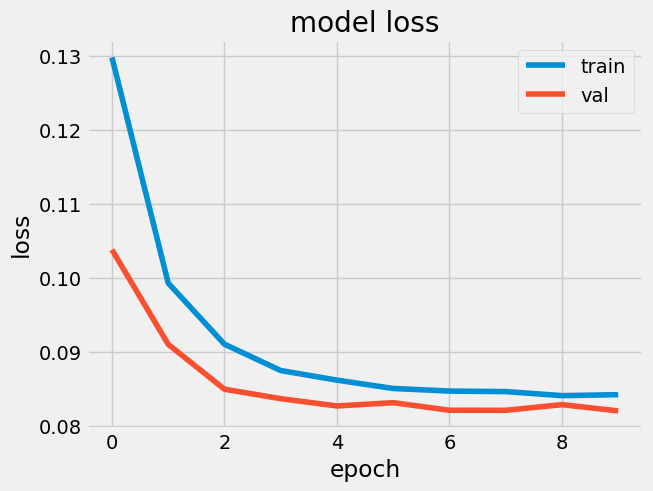

In [ ]:
#plot_loss(history) #contains both untrained and trained value set

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
import tensorflow as tf
# Make predictions on new data
new_data = np.array([
    [1, 67, 0, 1, 67, 27.32, 6.5, 200],
    [2, 54, 0, 0, 3, 27.32, 6.6, 80],
    [2, 44, 0, 0, 2, 19.31, 6.5, 200],
    [3, 65, 1, 0, 3, 29.9, 7.0, 120]
])

# Reshape new_data for prediction
new_data_reshaped = new_data.reshape(new_data.shape[0], 1, new_data.shape[1])

# Load the trained model for deployment (if not in the same session)
# model = tf.keras.models.load_model('trained_rnn_model')

predictions = model.predict(new_data_reshaped)
threshold = 0.5
predicted_classes = (predictions > threshold).astype(int)

print("Predicted Classes:")
print(predicted_classes)


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Load your dataset
# Replace 'your_dataset.csv' with the actual filename and path to your dataset
data = pd.read_csv('diabetes_prediction_dataset.csv')
data['smoking_history'].replace({'never': 0, 'No Info': 1, 'current': 5, 'former': 4, 'not current': 6, 'ever': 7}, inplace=True)
data['gender'].replace({'Male': 1, 'Female': 2, 'Other': 3}, inplace=True)

# Extract input features and target label
X = data[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
          'bmi', 'HbA1c_level', 'blood_glucose_level']].values

y = data['diabetes'].values

# Data preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape X for RNN (sequence length, number of features)
X = X.reshape(X.shape[0], 1, X.shape[1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the RNN model
model = keras.Sequential([
    keras.layers.SimpleRNN(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Calculate and print the confusion matrix
y_pred = (model.predict(X_test) > 0.5).astype(int)
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Generate and print the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Make predictions on new data
new_data = np.array([
    [1, 67, 0, 1, 67, 27.32, 6.5, 200],
    [2, 54, 0, 0, 3, 27.32, 6.6, 80],
    [2, 44, 0, 0, 2, 19.31, 6.5, 200],
    [3, 65, 1, 0, 3, 29.9, 7.0, 120]
])

# Reshape new_data for prediction
new_data_reshaped = new_data.reshape(new_data.shape[0], 1, new_data.shape[1])

predictions = model.predict(new_data_reshaped)
threshold = 0.5
predicted_classes = (predictions > threshold).astype(int)

print("Predicted Classes:")
print(predicted_classes)


Epoch 1/10
2500/2500 [==============================] - 10s 3ms/step - loss: 0.1343 - accuracy: 0.9518 - val_loss: 0.1002 - val_accuracy: 0.9664
Epoch 2/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.1048 - accuracy: 0.9640 - val_loss: 0.0864 - val_accuracy: 0.9704
Epoch 3/10
2500/2500 [==============================] - 6s 3ms/step - loss: 0.0951 - accuracy: 0.9667 - val_loss: 0.0800 - val_accuracy: 0.9728
Epoch 4/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0912 - accuracy: 0.9688 - val_loss: 0.0777 - val_accuracy: 0.9743
Epoch 5/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0889 - accuracy: 0.9695 - val_loss: 0.0759 - val_accuracy: 0.9750
Epoch 6/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0873 - accuracy: 0.9700 - val_loss: 0.0753 - val_accuracy: 0.9746
Epoch 7/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0866 - accuracy: 0.9700 - val_loss: 0.0756 - val_accurac